In [1]:
%matplotlib inline  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#%%time

# Load S&P 500 dataset over a 5 year period from Yahoo Finance
df = pd.read_csv('SP500.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-05-05,1879.449951,1885.510010,1866.770020,1884.660034,1884.660034,2733730000
1,2014-05-06,1883.689941,1883.689941,1867.719971,1867.719971,1867.719971,3327260000
2,2014-05-07,1868.530029,1878.829956,1859.790039,1878.209961,1878.209961,3632950000
3,2014-05-08,1877.390015,1889.069946,1870.050049,1875.630005,1875.630005,3393420000
4,2014-05-09,1875.270020,1878.569946,1867.020020,1878.479980,1878.479980,3025020000


## A. Data Wrangling

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
Date         1259 non-null object
Open         1259 non-null float64
High         1259 non-null float64
Low          1259 non-null float64
Close        1259 non-null float64
Adj Close    1259 non-null float64
Volume       1259 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [4]:
# Check for NaN value

df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

#### No NaN value was found in this dataset. 


#### Convert 'Date' to datetime object
#### Add day, month, year to the dataframe



In [5]:
df.Date = pd.to_datetime(df.Date) #convert 'date' to DateTime object
df['day'], df['month'], df['year'] = df.Date.dt.weekday_name, df.Date.dt.month, df.Date.dt.year
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year
0,2014-05-05,1879.449951,1885.510010,1866.770020,1884.660034,1884.660034,2733730000,Monday,5,2014
1,2014-05-06,1883.689941,1883.689941,1867.719971,1867.719971,1867.719971,3327260000,Tuesday,5,2014
2,2014-05-07,1868.530029,1878.829956,1859.790039,1878.209961,1878.209961,3632950000,Wednesday,5,2014
3,2014-05-08,1877.390015,1889.069946,1870.050049,1875.630005,1875.630005,3393420000,Thursday,5,2014
4,2014-05-09,1875.270020,1878.569946,1867.020020,1878.479980,1878.479980,3025020000,Friday,5,2014
5,2014-05-12,1880.030029,1897.130005,1880.030029,1896.650024,1896.650024,3005740000,Monday,5,2014
6,2014-05-13,1896.750000,1902.170044,1896.060059,1897.449951,1897.449951,2915680000,Tuesday,5,2014
7,2014-05-14,1897.130005,1897.130005,1885.770020,1888.530029,1888.530029,2822060000,Wednesday,5,2014
8,2014-05-15,1888.160034,1888.160034,1862.359985,1870.849976,1870.849976,3552640000,Thursday,5,2014
9,2014-05-16,1871.189941,1878.280029,1864.819946,1877.859985,1877.859985,3173650000,Friday,5,2014


#### Data Visualization

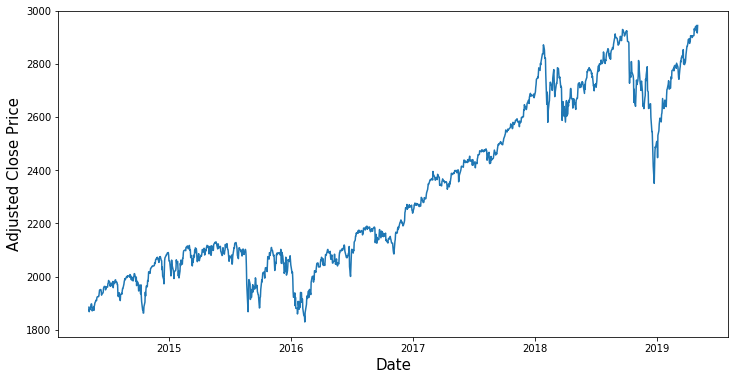

In [6]:
plt.figure(figsize=(12,6))

plt.plot(df['Date'],df['Adj Close'])

plt.ylabel('Adjusted Close Price', fontsize=15)
plt.xlabel('Date', fontsize=15)

plt.show()
plt.close()

## B. Apply Data Storytelling


### Question 1. Is there any effect of different times throughout the year on stock price? How do stock price & volume vary throughout a year?



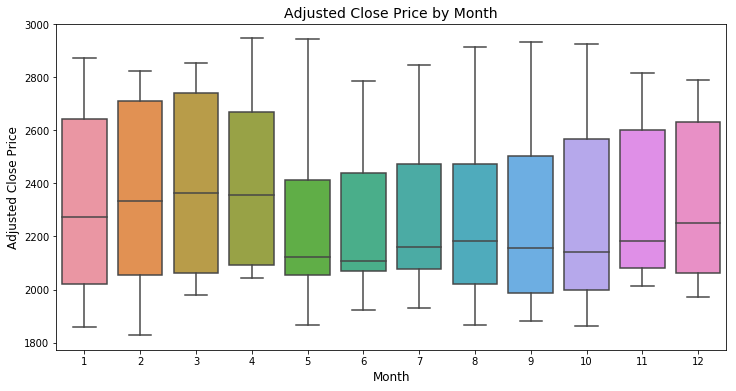

In [7]:
# Plot Adjusted Close Price by Month to detect Seasonality Effect

plt.figure(figsize=(12,6))
sns.boxplot(x = 'month', y = 'Adj Close', data = df)
plt.ylabel('Adjusted Close Price', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.title('Adjusted Close Price by Month', fontsize = 14)
plt.show()
plt.close()

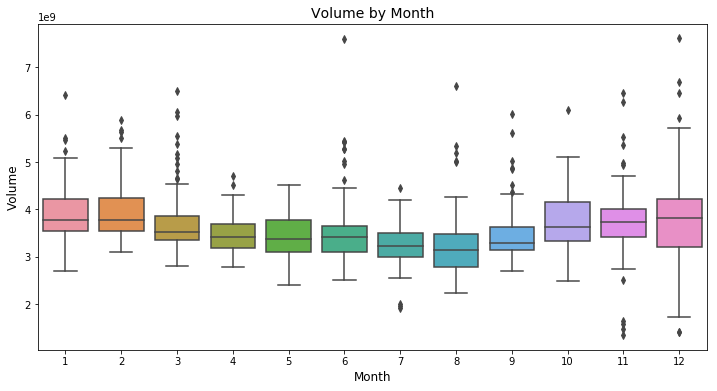

In [8]:
# Plot Volume by Month

plt.figure(figsize=(12,6))
sns.boxplot(x = 'month', y = 'Volume', data = df)
plt.ylabel('Volume', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.title('Volume by Month', fontsize = 14)
plt.show()
plt.close()

There are big changes in Price & Volume throughout a year. Let's look at some line plots to study the trend

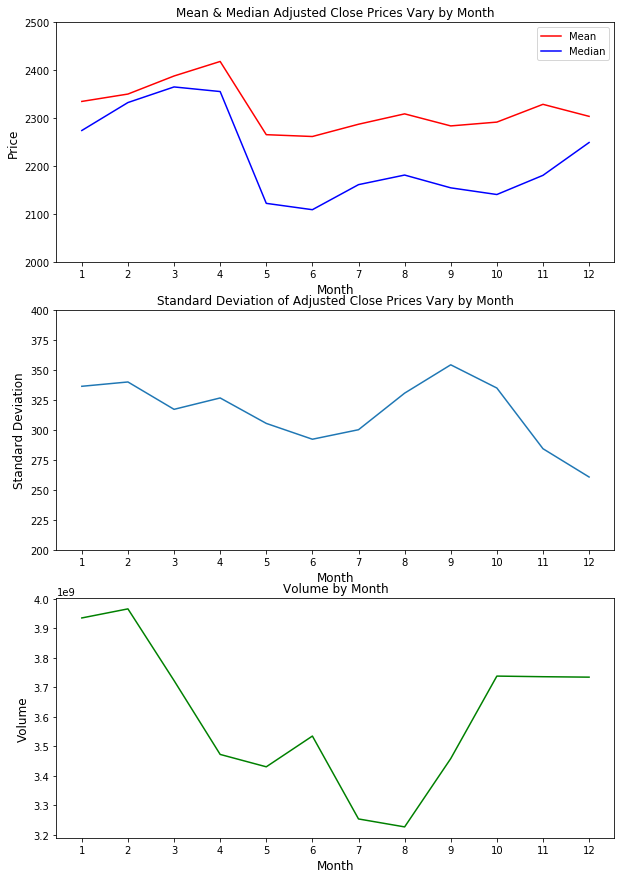

In [9]:
plt.figure(figsize=(10,15))

plt.figure(1)

# Plot Mean and Median by Month
plt.subplot(311)
plt.plot(df.groupby('month')[['Adj Close']].mean(),'red')
plt.plot(df.groupby('month')[['Adj Close']].median(),'blue')

plt.title('Mean & Median Adjusted Close Prices Vary by Month')
plt.xlabel('Month',fontsize=12)
plt.ylabel('Price',fontsize=12)
plt.legend(['Mean','Median'])

#plt.axis([1, 12, 2000, 2500])
plt.xticks(np.arange(1, 12.1, 1.0))
plt.yticks(np.arange(2000,2600,100))

# Plot standard deviation by month
plt.subplot(312)
plt.plot(df.groupby('month')[['Adj Close']].std())

plt.title('Standard Deviation of Adjusted Close Prices Vary by Month')
plt.xlabel('Month',fontsize=12)
plt.ylabel('Standard Deviation',fontsize=12)

plt.xticks(np.arange(1, 12.1, 1.0))
plt.yticks(np.arange(200,420,25))


# Plot Volume by month
plt.subplot(313)
plt.plot(df.groupby('month')[['Volume']].mean(),'green')

plt.title('Volume by Month')
plt.xlabel('Month',fontsize=12)
plt.ylabel('Volume',fontsize=12)

plt.xticks(np.arange(1, 12.1, 1.0))

# Show the plots
plt.show()

#### Volume can also be plotted in a bar graph

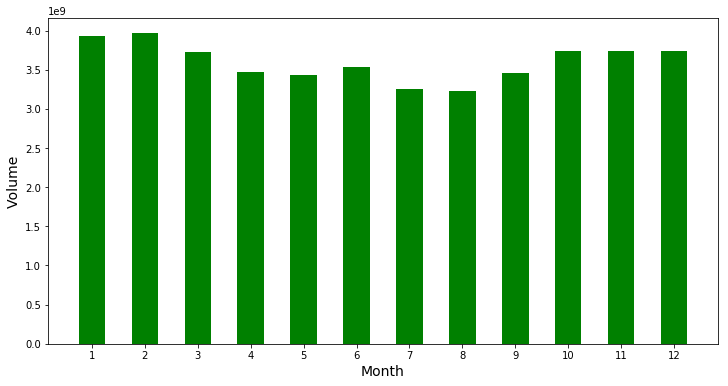

In [10]:
vol = df.groupby('month')[['Volume']].mean()

volbymonth = plt.figure(figsize=(12,6))

axis = volbymonth.add_subplot(1,1,1)
axis.bar(x=vol.index, height=vol.Volume, width = 0.5, color='green')

plt.ylabel('Volume',fontsize = 14)
plt.xlabel('Month',fontsize = 14)
plt.xticks(np.arange(1, 13, 1.0))

plt.show()


In [11]:
from scipy import stats
stats.pearsonr(df['Volume'],df['Adj Close'])

(-0.11034542244648882, 8.730196531925873e-05)

### Some insights:


* Price is highest in the first 4 months of a year.  It drops in summer, before increases again from October. 


* September is the time with highest standard deviation in stock prices. This could be due to the increase of volume , before price starts going up in October. Standard deviation starts going down from October, indicating market is getting more stable and has less fluctuation at that time.


* It is noticed that volume starts going down from March after staying high for the first 2 months, and this is followed by the drop of price in May. Volume increases rapidly in September and continues till end of the year, followed by increase of price from October. September is also the time that we observe maximum standard deviation, which could be due to this increase in volume that causes fluctuation in the market.


* These results seem to indicate that volume and price are well correlated with each other. However, Pearson Correlation Coefficient between Volume & Adjust Close Price indicates the 2 variables are reversely correlated. This could be explained as volume changes do not have immediate effects on price but a short time after that.
****



### Question 2. What is the effect of weekdays on stock price?

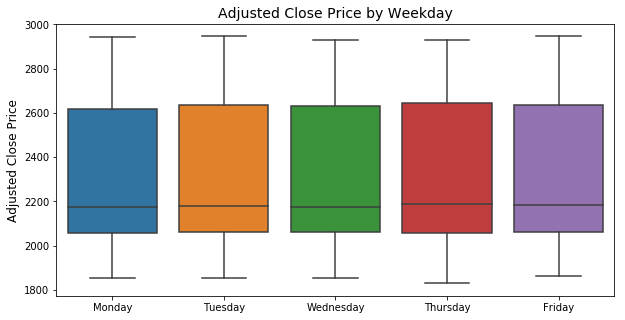

In [12]:
# Plot Adjusted Close Price vs. Weekdays

plt.figure(figsize=(10,5))
sns.boxplot(x = 'day', y = 'Adj Close', data = df)

plt.xlabel(None)
plt.ylabel('Adjusted Close Price', fontsize=12)

plt.title('Adjusted Close Price by Weekday', fontsize = 14)
plt.show()

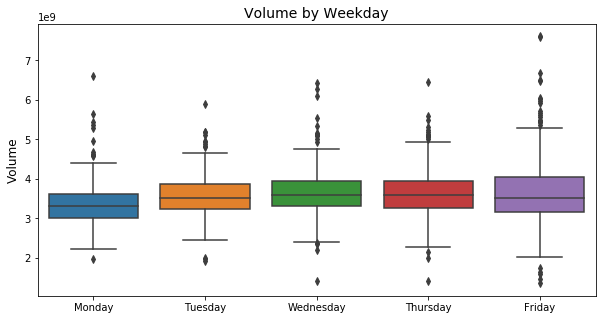

In [13]:
# Plot Volume vs. Weekdays

plt.figure(figsize=(10,5))
sns.boxplot(x = 'day', y = 'Volume', data = df)

plt.xlabel(None)
plt.ylabel('Volume', fontsize=12)

plt.title('Volume by Weekday', fontsize = 14)
plt.show()
plt.close()

#### There is not much difference in price throughout a week, however volume seems to increase from Monday to Friday. Let's look at some line plots to study the trend.

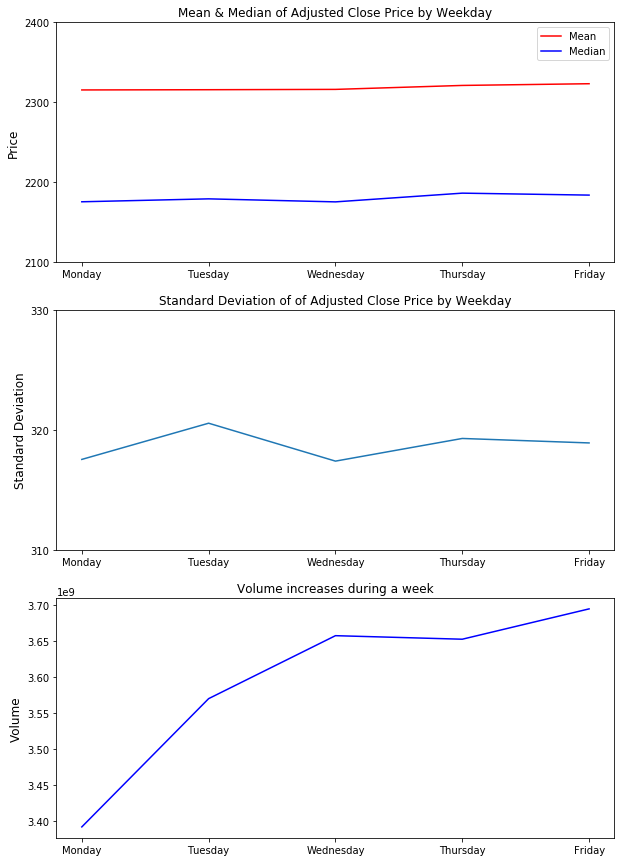

In [14]:
# Create a dictionary to map weekday

sorter = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
sorterIndex = dict(zip(sorter,range(len(sorter))))


# Calculate mean, median, standard deviation and volume by weekday

mean_by_day = df.groupby('day')[['Adj Close']].mean()
median_by_day = df.groupby('day')[['Adj Close']].median()
std_by_day = df.groupby('day')[['Adj Close']].std()

vol_by_day = df.groupby('day')[['Volume']].mean()


# Mapping 

mean_by_day['Day_id'] = mean_by_day.index
mean_by_day['Day_id'] = mean_by_day['Day_id'].map(sorterIndex)
mean_by_day.sort_values('Day_id', inplace=True)

median_by_day['Day_id'] = median_by_day.index
median_by_day['Day_id'] = median_by_day['Day_id'].map(sorterIndex)
median_by_day.sort_values('Day_id', inplace=True)

std_by_day['Day_id'] = std_by_day.index
std_by_day['Day_id'] = std_by_day['Day_id'].map(sorterIndex)
std_by_day.sort_values('Day_id', inplace=True)

vol_by_day['Day_id'] = vol_by_day.index
vol_by_day['Day_id'] = vol_by_day['Day_id'].map(sorterIndex)
vol_by_day.sort_values('Day_id', inplace=True)


# Plotting
plt.figure(figsize=(10,15))

# Plot Mean and Median by Weekday
plt.subplot(311)
plt.plot(mean_by_day['Adj Close'],'red')
plt.plot(median_by_day['Adj Close'],'blue')

plt.title('Mean & Median of Adjusted Close Price by Weekday')
plt.ylabel('Price',fontsize=12)
plt.legend(['Mean','Median'])

plt.yticks(np.arange(2100,2401,100))


# Plot standard deviation by Weekday
plt.subplot(312)
plt.plot(std_by_day['Adj Close'])

plt.title('Standard Deviation of of Adjusted Close Price by Weekday')
plt.ylabel('Standard Deviation',fontsize=12)

plt.yticks(np.arange(310,340,10))


# Plot Volume by Weekday
plt.subplot(313)
plt.plot(vol_by_day['Volume'],'blue')

plt.title('Volume increases during a week')
plt.ylabel('Volume',fontsize=12)

# Show the plots
plt.show()

#### Volume can also be plotted in a bar graph

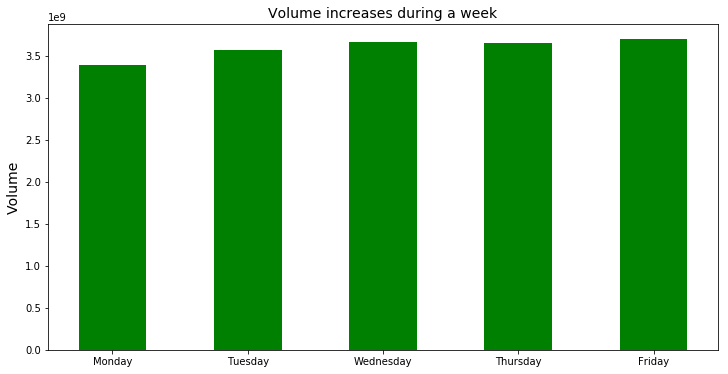

In [15]:
volbyday = plt.figure(figsize=(12,6))

axis = volbyday.add_subplot(1,1,1)
axis.bar(x=vol_by_day.index, height=vol_by_day.Volume, width = 0.5, color='green')

plt.title('Volume increases during a week',fontsize = 14)
plt.ylabel('Volume',fontsize = 14)

plt.show()



### Answer

* When averaging by weekday throughout a period of 5 years, there is no significant difference observed in prices between weekdays. This indicates that when price is in an increase or decrease cycle, it usually lasts for more than 1 week. Therefore, price averaging by weekday does not show significant difference here.

* Volume, however, shows significant change during a week. Volume is at its lowest on Monday, and keeps increasing until Friday. This represents the intensity in the market, low on Monday and high on Friday.

### This is end of chapter 7. Data Storytelling

In [16]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year
0,2014-05-05,1879.449951,1885.510010,1866.770020,1884.660034,1884.660034,2733730000,Monday,5,2014
1,2014-05-06,1883.689941,1883.689941,1867.719971,1867.719971,1867.719971,3327260000,Tuesday,5,2014
2,2014-05-07,1868.530029,1878.829956,1859.790039,1878.209961,1878.209961,3632950000,Wednesday,5,2014
3,2014-05-08,1877.390015,1889.069946,1870.050049,1875.630005,1875.630005,3393420000,Thursday,5,2014
4,2014-05-09,1875.270020,1878.569946,1867.020020,1878.479980,1878.479980,3025020000,Friday,5,2014


### Machine Learning Model

#### 1. Facebook Prophet

##### Pros:

- non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

0.25 10 0.9130350976256835 1.1576210294989333


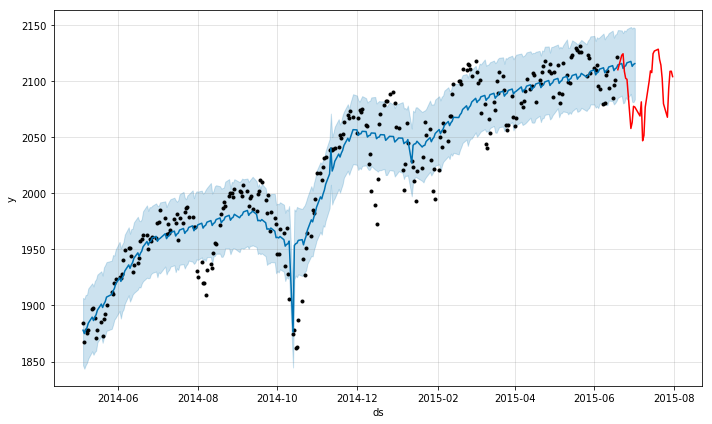

0.25 20 0.9130350976256835 1.3370134277428272


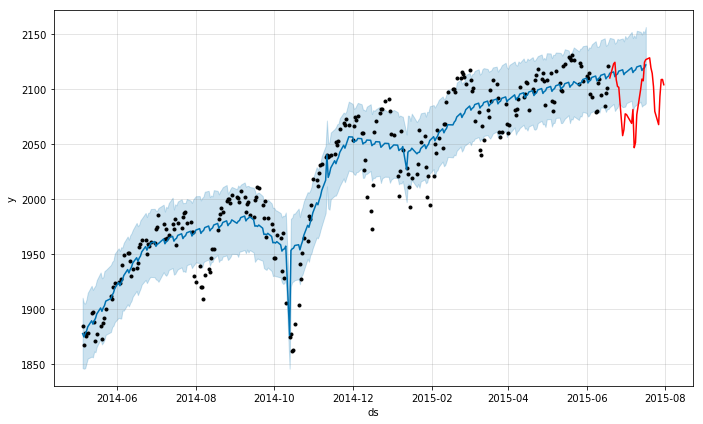

0.25 30 0.9130350976256835 1.2257704243156646


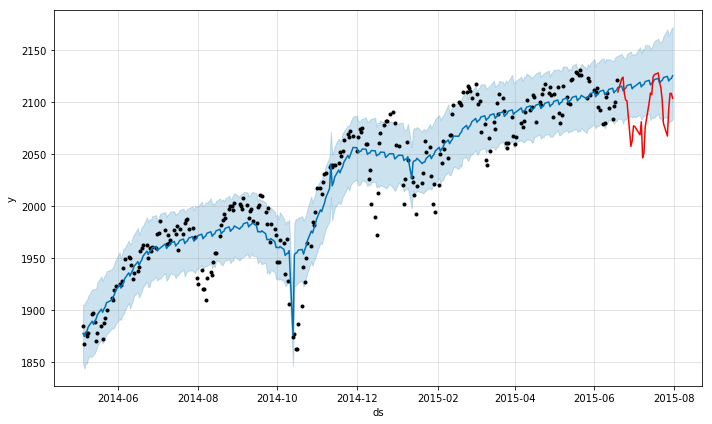

0.5 10 1.1741854267184448 0.613347233928962


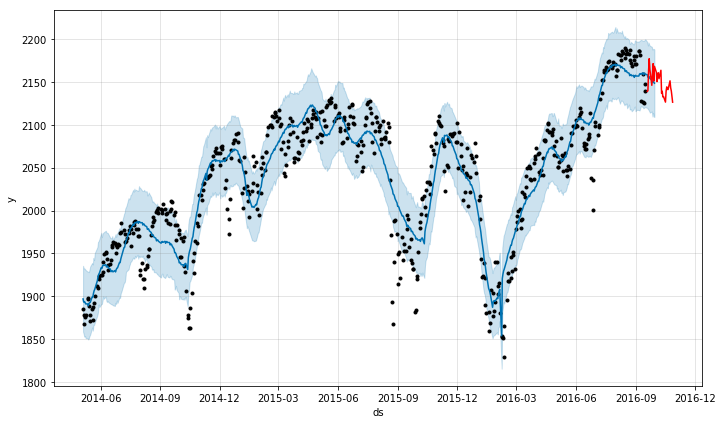

0.5 20 1.1741854267184448 0.7073732287176377


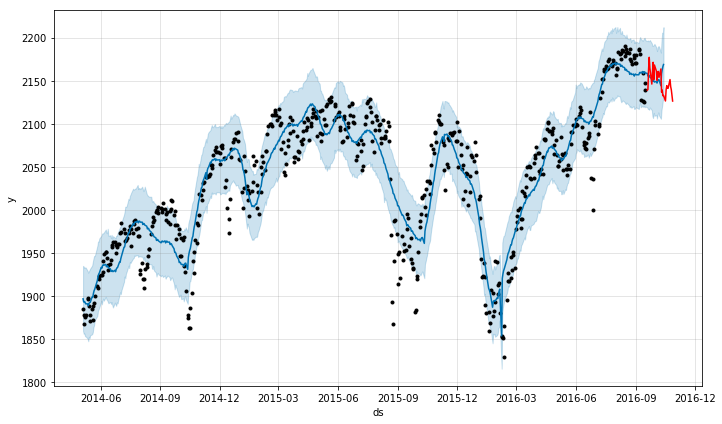

0.5 30 1.1741854267184448 1.5630488862286276


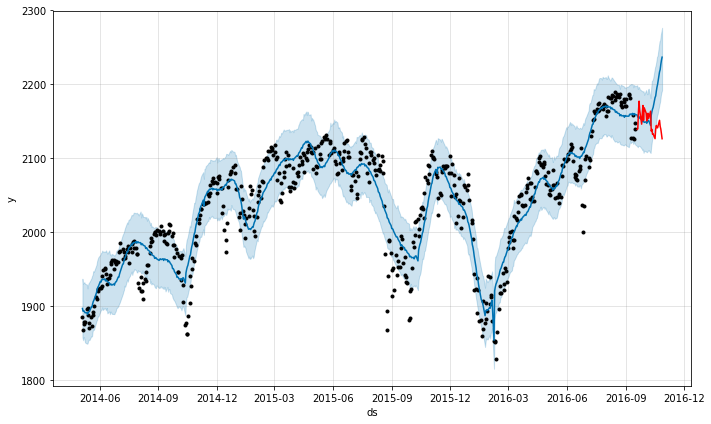

0.75 10 0.9924099908531316 0.8010012089201929


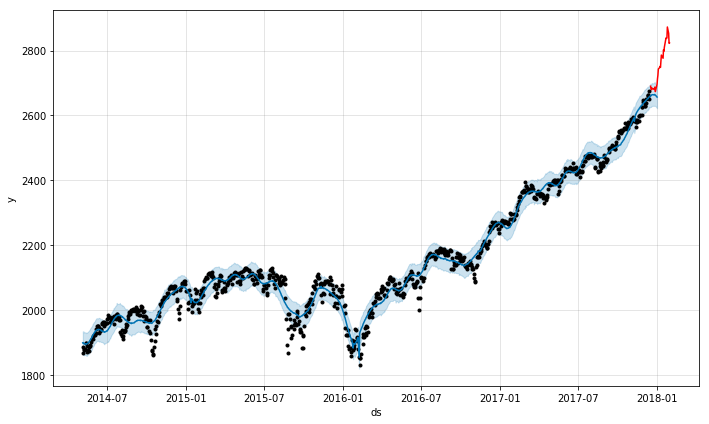

0.75 20 0.9924099908531316 2.447730527349328


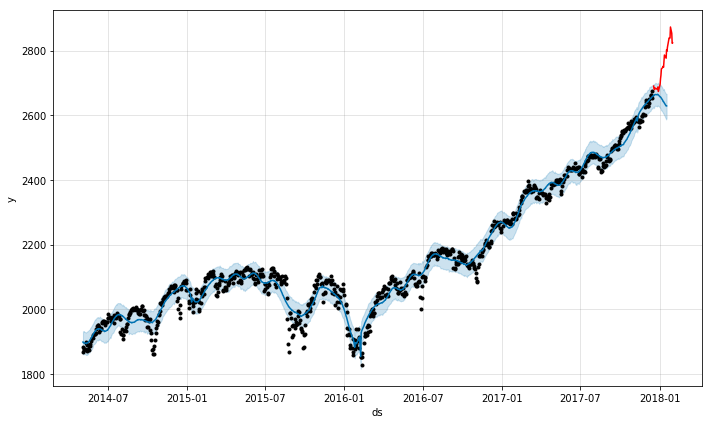

0.75 30 0.9924099908531316 4.03750282588906


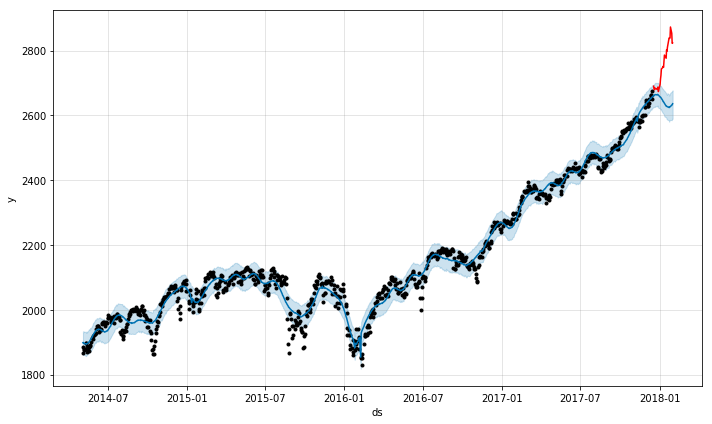

1.0 10 1.7194972186268822 4.271471580632374


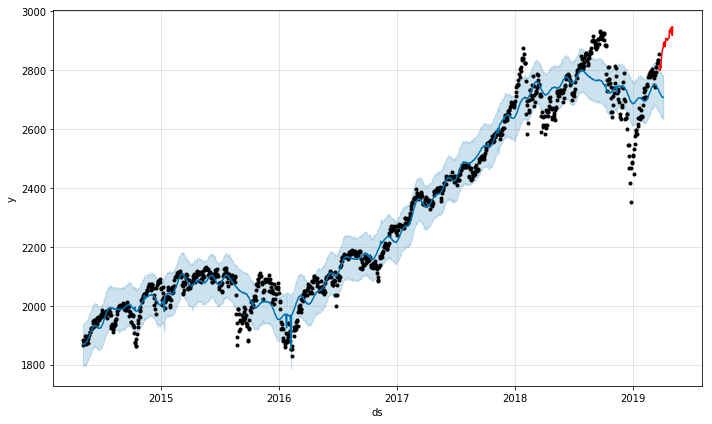

1.0 20 1.7194972186268822 5.331536958272496


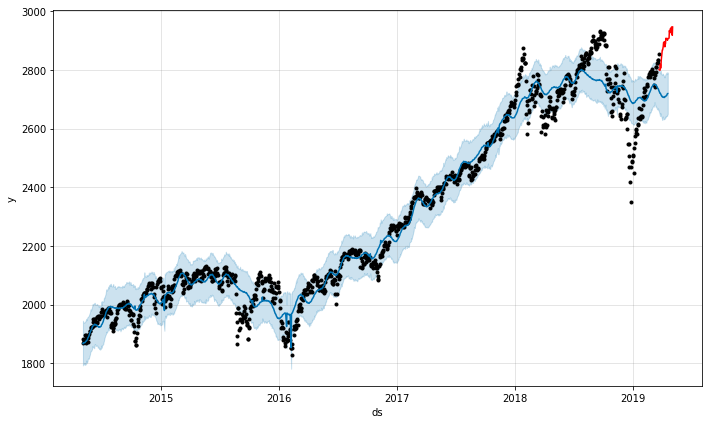

1.0 30 1.7194972186268822 5.843521551975627


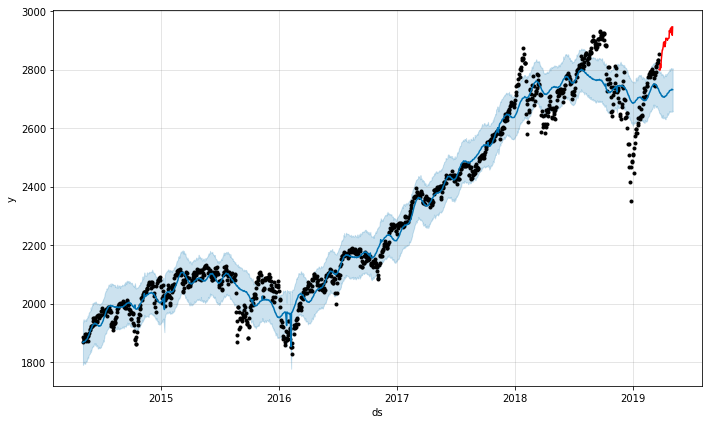

In [17]:
# Use out of box model to demonstrate prediction at different points in time
# with different prediction length

from fbprophet import Prophet
import logging

logging.getLogger().setLevel(logging.ERROR)

# Create input dataframe
prophet_df = df[['Date', 'Adj Close']]

# Rename to ds and y
prophet_df.columns = ['ds', 'y']


# Create holidays & special events
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

# Prediction Size
H = [10, 20, 30]
Hmax = H[-1]

# Initiate min error
min_mape = 100.0

# End points of training set
div_ratio = [0.25, 0.5, 0.75, 1.0]

for div_point in div_ratio:
    for prediction_size in H:
        div = np.int(len(prophet_df)*div_point) #+ 1
        train_prophet = prophet_df[:(div - Hmax)]    # -prediction_size]
        train_end = len(train_prophet)
        test_end = train_end + prediction_size

        if test_end > len(prophet_df):
            print('test set out of boundary')
        
        default = Prophet(holidays = holidays)
        default.add_country_holidays(country_name='US')
        default.fit(train_prophet)
        future_def = default.make_future_dataframe(periods = prediction_size)
        future_def['ds'] = prophet_df['ds'][:len(future_def)] # do this to fix the 'ds' column in future dataframe
                        
        forecast_def = default.predict(future_def) # The predict method will assign each row in future a predicted value which it names yhat.

        train_error_def = 100*np.abs(forecast_def['yhat'][:train_end] - prophet_df['y'][:train_end])/prophet_df['y'][:train_end]
        test_error_def = 100*np.abs(forecast_def['yhat'][train_end:test_end] - prophet_df['y'][train_end:test_end])/prophet_df['y'][train_end:test_end]


        train_mape_def = train_error_def.mean()
        test_mape_def = test_error_def.mean()
        
        print(div_point, prediction_size, train_mape_def, test_mape_def)
        
        default.plot(forecast_def)
        plt.plot(prophet_df['ds'][train_end:div], prophet_df['y'][train_end:div], c='red')
        plt.show()

        
#                        if mape < min_mape:
#                            min_mape = mape
#                            min_i = i
#                            min_j = j
#                            min_k = k
#                            min_l = l
#                            min_m = m
                            
#print('Minimum value of Mean absolute percentage error (%) = ', min_mape)
#print(min_i, min_j, min_k, min_l, min_m)




In [18]:
# Here we demonstrate one case with hyperparameter tuning and see improvement in train & test error
from fbprophet import Prophet
import logging

logging.getLogger().setLevel(logging.ERROR)

# Create input dataframe
prophet_df = df[['Date', 'Adj Close']]

# Rename to ds and y
prophet_df.columns = ['ds', 'y']


# Create holidays & special events
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

# Initiate min error
min_mape = 100.0

# End points of training set
div_ratio = [1.0] # we target the last part in the graph, which is also the most difficult area to predict

# Prediction Size
H = [10, 20, 30]
Hmax = H[-1]

# Changepoints hyperparameters
changepoint_prior_scales = [0.05, 0.1, 0.3, 0.5] # default value is 0.05

# Seasonality parameters
yearly_seasonality_range = [5, 10, 15] # default value is 10

print('----Hyperparameters Tuning----')
print('Predic. Length --- Changepoint prior scale --- Yearly seasonality --- Train Error --- Test Error')

# Inititate empty list of error
train_err = []
test_err = []

for div_point in div_ratio:
    for prediction_size in H:
        div = np.int(len(prophet_df)*div_point) #+ 1
        train_prophet = prophet_df[:(div - Hmax)]    # -prediction_size]
        train_end = len(train_prophet)
        test_end = train_end + prediction_size

        if test_end > len(prophet_df):
            print('test set out of boundary')
        
        for i in changepoint_prior_scales:  # this was found to be VERY IMPORTANT! It helps predict the trend!    
            for j in yearly_seasonality_range:  # this is IMPORTANT!
                p = Prophet(changepoint_prior_scale=i, yearly_seasonality = j, holidays = holidays)
                p.add_country_holidays(country_name='US')

                # fit model
                p.fit(train_prophet)
                future = p.make_future_dataframe(periods = prediction_size)
                future['ds'] = prophet_df['ds'][:len(future)] # do this to fix the 'ds' column in future dataframe
                        
                # predict future values
                forecast = p.predict(future) # The predict method will assign each row in future a predicted value which it names yhat.
                                
                # Calculate train & test error
                train_error = 100*np.abs(forecast['yhat'][:train_end] - prophet_df['y'][:train_end])/prophet_df['y'][:train_end]
                test_error = 100*np.abs(forecast['yhat'][train_end:test_end] - prophet_df['y'][train_end:test_end])/prophet_df['y'][train_end:test_end]

                # Convert error to MAPE
                train_mape = train_error.mean()
                test_mape = test_error.mean()
        
                # Record the errors
                train_err.append(train_mape)
                test_err.append(test_mape)

                print(prediction_size, i, j, train_mape, test_mape)
        
#        default.plot(forecast_def)
#        plt.plot(prophet_df['ds'][train_end:div], prophet_df['y'][train_end:div], c='red')
#        plt.show()

        
#                        if mape < min_mape:
#                            min_mape = mape
#                            min_i = i
#                            min_j = j
#                            min_k = k
#                            min_l = l
#                            min_m = m
                            
#print('Minimum value of Mean absolute percentage error (%) = ', min_mape)
#print(min_i, min_j, min_k, min_l, min_m)

----Hyperparameters Tuning----
Predic. Length --- Changepoint prior scale --- Yearly seasonality --- Train Error --- Test Error
10 0.05 5 1.7041864133444296 4.028867990930721
10 0.05 10 1.7194972186268822 4.271471580632374
10 0.05 15 1.7120886240451179 4.565801274237719
10 0.1 5 1.2502388055396525 1.489478790473211
10 0.1 10 1.2375907731367903 1.5870156760525973
10 0.1 15 1.2213397221231788 1.7831508311873083
10 0.3 5 1.1429331267756762 0.8258620545750981
10 0.3 10 1.14476800830543 0.7867470461542396
10 0.3 15 1.1405499869738331 0.9492683173380054
10 0.5 5 1.1270469996103663 0.9542647582208357
10 0.5 10 1.1292338758120717 0.8653087410606561
10 0.5 15 1.1276261020093636 1.0110888665781397
20 0.05 5 1.7041864133444296 5.162149559834846
20 0.05 10 1.7194972186268822 5.331536958272496
20 0.05 15 1.7120886240451179 5.427282632462105
20 0.1 5 1.2502388055396525 2.2721415068368014
20 0.1 10 1.2375907731367903 2.2704561467927507
20 0.1 15 1.2213397221231788 2.305720359786386
20 0.3 5 1.1429331

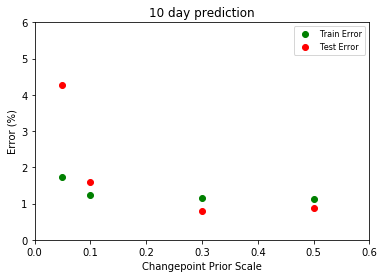

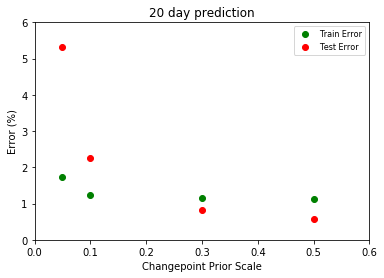

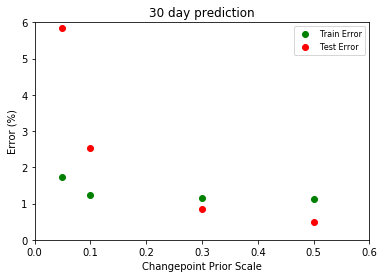

In [19]:
# 10 day prediction, vary changepoint_prior_scale only

train_err_plot = [train_err[1], train_err[4], train_err[7], train_err[10]]
test_err_plot = [test_err[1], test_err[4], test_err[7], test_err[10]]

a = plt.scatter(x = changepoint_prior_scales, y = train_err_plot, c = 'green')
b = plt.scatter(x = changepoint_prior_scales, y = test_err_plot, c = 'red')

plt.legend((a, b),
           ('Train Error', 'Test Error'),
           scatterpoints=1,
           loc='upper right',
           ncol=1,
           fontsize=8)

plt.title('10 day prediction')
plt.xlabel('Changepoint Prior Scale')
plt.ylabel('Error (%)')
plt.xlim(0, 0.6)
plt.ylim(0, 6)
plt.show()

# 20 day prediction, vary changepoint_prior_scale only

train_err_plot = [train_err[13], train_err[16], train_err[19], train_err[22]]
test_err_plot = [test_err[13], test_err[16], test_err[19], test_err[22]]

a = plt.scatter(x = changepoint_prior_scales, y = train_err_plot, c = 'green')
b = plt.scatter(x = changepoint_prior_scales, y = test_err_plot, c = 'red')

plt.legend((a, b),
           ('Train Error', 'Test Error'),
           scatterpoints=1,
           loc='upper right',
           ncol=1,
           fontsize=8)

plt.title('20 day prediction')
plt.xlabel('Changepoint Prior Scale')
plt.ylabel('Error (%)')
plt.xlim(0, 0.6)
plt.ylim(0, 6)
plt.show()


# 30 day prediction, vary changepoint_prior_scale only

train_err_plot = [train_err[25], train_err[28], train_err[31], train_err[34]]
test_err_plot = [test_err[25], test_err[28], test_err[31], test_err[34]]

a = plt.scatter(x = changepoint_prior_scales, y = train_err_plot, c = 'green')
b = plt.scatter(x = changepoint_prior_scales, y = test_err_plot, c = 'red')

plt.legend((a, b),
           ('Train Error', 'Test Error'),
           scatterpoints=1,
           loc='upper right',
           ncol=1,
           fontsize=8)

plt.title('30 day prediction')
plt.xlabel('Changepoint Prior Scale')
plt.ylabel('Error (%)')
plt.xlim(0, 0.6)
plt.ylim(0, 6)
plt.show()

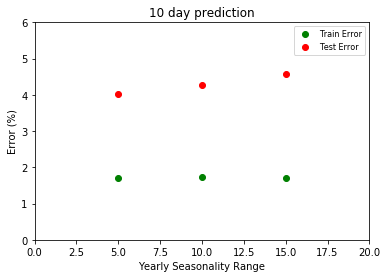

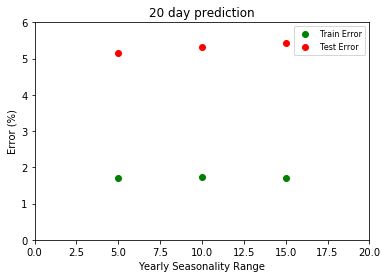

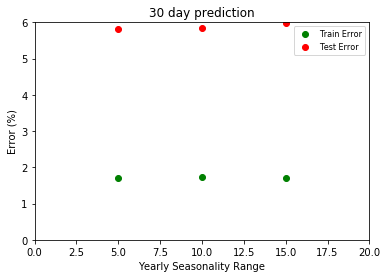

In [20]:
# 10 day prediction, vary yearly_seasonality only

train_err_plot = [train_err[0], train_err[1], train_err[2]]
test_err_plot = [test_err[0], test_err[1], test_err[2]]

a = plt.scatter(x = yearly_seasonality_range, y = train_err_plot, c = 'green')
b = plt.scatter(x = yearly_seasonality_range, y = test_err_plot, c = 'red')

plt.legend((a, b),
           ('Train Error', 'Test Error'),
           scatterpoints=1,
           loc='upper right',
           ncol=1,
           fontsize=8)

plt.title('10 day prediction')
plt.xlabel('Yearly Seasonality Range')
plt.ylabel('Error (%)')
plt.xlim(0, 20)
plt.ylim(0, 6)
plt.show()

# 20 day prediction, vary changepoint_prior_scale only

train_err_plot = [train_err[12], train_err[13], train_err[14]]
test_err_plot = [test_err[12], test_err[13], test_err[14]]

a = plt.scatter(x = yearly_seasonality_range, y = train_err_plot, c = 'green')
b = plt.scatter(x = yearly_seasonality_range, y = test_err_plot, c = 'red')

plt.legend((a, b),
           ('Train Error', 'Test Error'),
           scatterpoints=1,
           loc='upper right',
           ncol=1,
           fontsize=8)

plt.title('20 day prediction')
plt.xlabel('Yearly Seasonality Range')
plt.ylabel('Error (%)')
plt.xlim(0, 20)
plt.ylim(0, 6)
plt.show()


# 30 day prediction, vary changepoint_prior_scale only

train_err_plot = [train_err[24], train_err[25], train_err[26]]
test_err_plot = [test_err[24], test_err[25], test_err[26]]

a = plt.scatter(x = yearly_seasonality_range, y = train_err_plot, c = 'green')
b = plt.scatter(x = yearly_seasonality_range, y = test_err_plot, c = 'red')

plt.legend((a, b),
           ('Train Error', 'Test Error'),
           scatterpoints=1,
           loc='upper right',
           ncol=1,
           fontsize=8)

plt.title('30 day prediction')
plt.xlabel('Yearly Seasonality Range')
plt.ylabel('Error (%)')
plt.xlim(0, 20)
plt.ylim(0, 6)
plt.show()

#### End of Prophet

#### 2. Extreme Gradient Boosting XGB

In [21]:
import xgboost as xgb
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [22]:
# Create input dataframe
df_xgb = df.copy()

df_xgb.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year
0,2014-05-05,1879.449951,1885.510010,1866.770020,1884.660034,1884.660034,2733730000,Monday,5,2014
1,2014-05-06,1883.689941,1883.689941,1867.719971,1867.719971,1867.719971,3327260000,Tuesday,5,2014
2,2014-05-07,1868.530029,1878.829956,1859.790039,1878.209961,1878.209961,3632950000,Wednesday,5,2014
3,2014-05-08,1877.390015,1889.069946,1870.050049,1875.630005,1875.630005,3393420000,Thursday,5,2014
4,2014-05-09,1875.270020,1878.569946,1867.020020,1878.479980,1878.479980,3025020000,Friday,5,2014


##### Train/Test Split

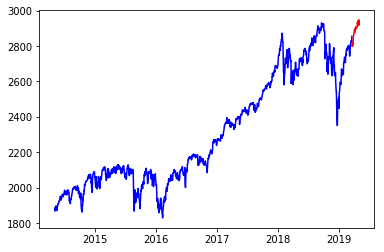

In [23]:
df_xgb_train = df_xgb[:(len(df_xgb)-30)]
df_xgb_test = df_xgb[len(df_xgb)-30:]

#_ = df_xgb_test \
#    .rename(columns={'Adj Close': 'TEST SET'}) \
#    .join(df_xgb_train.rename(columns={'Adj Close': 'TRAINING SET'}), how='outer') \
#    .plot(figsize=(15,5), title='Adj Close', style='.')

plt.plot(df_xgb_train['Date'], df_xgb_train['Adj Close'], c= 'blue')
plt.plot(df_xgb_test['Date'], df_xgb_test['Adj Close'], c= 'red')
plt.show()

In [24]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['dayofweek'] = df['Date'].dt.dayofweek
    df['quarter'] = df['Date'].dt.quarter
    df['month'] = df['Date'].dt.month
    df['year'] = df['Date'].dt.year
    df['dayofyear'] = df['Date'].dt.dayofyear
    df['dayofmonth'] = df['Date'].dt.day
    df['weekofyear'] = df['Date'].dt.weekofyear
    
    X = df[['dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

In [25]:
X_train, y_train = create_features(df_xgb_train, label='Adj Close')
X_test, y_test = create_features(df_xgb_test, label='Adj Close')


In [26]:
X_train.head()

,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
0,0,2,5,2014,125,5,19
1,1,2,5,2014,126,6,19
2,2,2,5,2014,127,7,19
3,3,2,5,2014,128,8,19
4,4,2,5,2014,129,9,19


In [27]:
X_train_new = X_train.copy()

In [28]:
X_train_new['MA_5'] = y_train.rolling(1).mean()

In [29]:
X_train_new.head()

,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,MA_5
0,0,2,5,2014,125,5,19,1884.660034
1,1,2,5,2014,126,6,19,1867.719971
2,2,2,5,2014,127,7,19,1878.209961
3,3,2,5,2014,128,8,19,1875.630005
4,4,2,5,2014,129,9,19,1878.479980


In [30]:
y_train.head()

0    1884.660034
1    1867.719971
2    1878.209961
3    1875.630005
4    1878.479980
Name: Adj Close, dtype: float64

#### Create XGBoost Model

In [31]:
reg = xgb.XGBRegressor(n_estimators=1000000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False) # Change verbose to True if you want to see it train

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000000, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

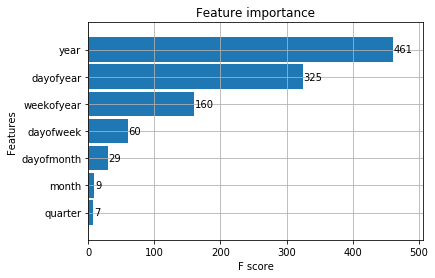

In [32]:
_ = plot_importance(reg, height=0.9)

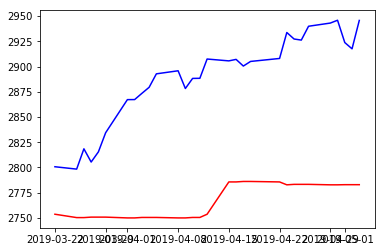

In [33]:
df_xgb_test['Predicted Price'] = reg.predict(X_test)

#plt.plot(df_xgb_train['Date'], df_xgb_train['Adj Close'], c = 'green')
plt.plot(df_xgb_test['Date'], df_xgb_test['Adj Close'], c = 'blue')
plt.plot(df_xgb_test['Date'], df_xgb_test['Predicted Price'], c = 'red')
plt.show()

In [34]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(y_true=df_xgb_test['Adj Close'],
                   y_pred=df_xgb_test['Predicted Price'])

4.197136254187138

We need to create more features for better performance.

#### Below is craft

In [ ]:
# 10 day prediction, vary changepoint_prior_scale only

train_err_plot = [train_err[1], train_err[4], train_err[7], train_err[10]]
test_err_plot = [test_err[1], test_err[4], test_err[7], test_err[10]]

sns.scatterplot(x = changepoint_prior_scales, y = train_err_plot, color = 'green')
sns.scatterplot(x = changepoint_prior_scales, y = test_err_plot, color = 'red')

In [ ]:
# 20 day prediction, vary changepoint_prior_scale only

train_err_plot = [train_err[13], train_err[16], train_err[19], train_err[22]]
test_err_plot = [test_err[13], test_err[16], test_err[19], test_err[22]]

sns.scatterplot(x = changepoint_prior_scales, y = train_err_plot, color = 'green')
sns.scatterplot(x = changepoint_prior_scales, y = test_err_plot, color = 'red')

In [ ]:
# 30 day prediction, vary changepoint_prior_scale only

train_err_plot = [train_err[25], train_err[28], train_err[31], train_err[34]]
test_err_plot = [test_err[25], test_err[28], test_err[31], test_err[34]]

sns.scatterplot(x = changepoint_prior_scales, y = train_err_plot, color = 'green')
sns.scatterplot(x = changepoint_prior_scales, y = test_err_plot, color = 'red')

In [ ]:
from fbprophet import Prophet
import logging

logging.getLogger().setLevel(logging.ERROR)

#prophet_df = df.copy()
prophet_df = df[['Date', 'Adj Close']]

# Rename to ds and y
prophet_df.columns = ['ds', 'y']


# Create holidays & special events
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

# Changepoints hyperparameters
changepoint_prior_scales = [0.05, 0.5] # default value is 0.05
changepoint_ranges = [0.7, 0.75, 0.8, 0.85, 0.9]

# Seasonality parameters
yearly_seasonality_range = [15, 10, 5] # default value is 10
seasonality_prior_scales = [0.01, 0.05, 0.1, 0.3, 0.5]

# Holidays & Events
holiday_prior_scales = [0.05, 0.5] # default is 0.05

# Prediction Size
H = [30]#, 45, 60]
Hmax = 60

# Initiate min error
min_mape = 100.0

# End points of training set
div_ratio = [0.25, 0.5, 0.75, 1.0]

for prediction_size in H:
    for div_point in div_ratio:
        div = np.int(len(prophet_df)*div_point) #+ 1
        train_prophet = prophet_df[:(div - Hmax)]    # -prediction_size]
        train_end = len(train_prophet)
        test_end = train_end + prediction_size

        if test_end > len(prophet_df):
            print('test set out of boundary')
        
        for i in changepoint_prior_scales:  # this was found to be VERY IMPORTANT! It helps predict the trend!
#for j in changepoint_ranges: changepoint_range=j,
            for k in yearly_seasonality_range:  # this is IMPORTANT!
#for l in seasonality_prior_scales: # this is negligible
#for m in holiday_prior_scales: # this is negligible
                p = Prophet(changepoint_prior_scale=i, yearly_seasonality = k, holidays = holidays)
                p.add_country_holidays(country_name='US')
                p.fit(train_prophet)
                future = p.make_future_dataframe(periods = prediction_size)
                future['ds'] = prophet_df['ds'][:len(future)] # do this to fix the 'ds' column in future dataframe
                        
                forecast = p.predict(future) # The predict method will assign each row in future a predicted value which it names yhat.

                train_error = 100*np.abs(forecast['yhat'][:train_end] - prophet_df['y'][:train_end])/prophet_df['y'][:train_end]
#                test_error = 100*np.abs(forecast['yhat'][-train_end:] - prophet_df['y'][-train_end:])/prophet_df['y'][-train_end:]
                test_error = 100*np.abs(forecast['yhat'][train_end:test_end] - prophet_df['y'][train_end:test_end])/prophet_df['y'][train_end:test_end]


                train_mape = train_error.mean()
                test_mape = test_error.mean()
        
#                print('H =', prediction_size, '; changepoint_prior_scale = ', i, 'holiday prior scale =', m, '; train error = ', train_mape, '; test error = ', test_mape)
                print(prediction_size, div_point, i, k, train_mape, test_mape)
        p.plot(forecast)
        plt.plot(prophet_df['ds'][:len(forecast)], prophet_df['y'][:len(forecast)], c='red')
        plt.show()

        
#                        if mape < min_mape:
#                            min_mape = mape
#                            min_i = i
#                            min_j = j
#                            min_k = k
#                            min_l = l
#                            min_m = m
                            
#print('Minimum value of Mean absolute percentage error (%) = ', min_mape)
#print(min_i, min_j, min_k, min_l, min_m)



In [ ]:
p.plot(forecast)
plt.plot(prophet_df['ds'], prophet_df['y'], c='red')
plt.show()

In [ ]:
len(prophet_df)/250

In [ ]:
from fbprophet import Prophet
import logging

logging.getLogger().setLevel(logging.ERROR)

In [ ]:
#prophet_df = df.copy()
prophet_df = df[['Date', 'Adj Close']]

# Rename to ds and y
prophet_df.columns = ['ds', 'y']

prophet_df.tail(31)

In [ ]:
prediction_size = 30
train_prophet = prophet_df[:-prediction_size]
print(train_prophet.head())
print(train_prophet.tail())
print(len(prophet_df), len(train_prophet))

In [ ]:
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))
#holidays = pd.DataFrame()
#holidays.columns = ['holiday','ds']

In [ ]:
holidays

In [ ]:
m = Prophet()#(holidays=holidays)
#m.add_country_holidays(country_name='US')

m = Prophet() #(changepoint_range=0.9) # instantiating a new Prophet object. Linear model is used by default. I tried with Logistic model but it was not good.
m.fit(train_prophet)

future = m.make_future_dataframe(periods = prediction_size) # get a dataframe that extends into the future a specified number of days
print(future.head())
print(future.tail(10))

# found out that when future extends into the future to get space for future predicted values, it also includes weekend
# which is not wanted

In [ ]:
future['ds'] = prophet_df['ds'] # do this to fix the 'ds' column in future dataframe

In [ ]:
future.tail(10) # recheck

In [ ]:
forecast = m.predict(future) # The predict method will assign each row in future a predicted value which it names yhat.
forecast.tail(10) # The forecast object here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals.

error = 100*np.abs(forecast['yhat'] - prophet_df['y'])/prophet_df['y']
print('Mean absolute percentage error (%) = ', error.mean())

In [ ]:
m.plot(forecast)
plt.plot(prophet_df['ds'], prophet_df['y'], c='red')
plt.show()

In [ ]:
plt.plot(prophet_df['ds'], error)
plt.show()

In [ ]:
m.plot_components(forecast) # not clear about this part yet. Why are there Saturday and Sunday in the charts?

In [ ]:
from fbprophet.plot import plot_forecast_component
plot_forecast_component(m, forecast, 'playoff')

In [ ]:
m.train_holiday_names

* Real time series frequently have abrupt changes in their trajectories. By default, Prophet will automatically detect these changepoints and will allow the trend to adapt appropriately. However, if you wish to have finer control over this process (e.g., Prophet missed a rate change, or is overfitting rate changes in the history), then there are several input arguments you can use.

In [ ]:
from fbprophet.plot import add_changepoints_to_plot

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast) # a default value 80% for changepoints is used here

plt.plot(prophet_df['ds'], prophet_df['y'], c='red')
plt.show()

In [ ]:
plt.plot(forecast['ds'], forecast['yhat'])
plt.plot(prophet_df['ds'], prophet_df['y'])
plt.show()

In [ ]:
df1718 = df.loc[(df.year == 2017) | (df.year == 2018)]

In [ ]:
df1718.year.value_counts()

In [ ]:
def lin_reg_pred(df, target, offset, t, delta_t):

    """
    Given a dataframe, get prediction at timestep t using values from t-1, t-2, ..., 2, 1, 0.
    
    Inputs
        df: dataframe containing the values that we want to predict.
        target: the variable that we want to predict e.g. 'adj_close'
        offset: we only do prediction with training size >= offset.
    """

    # Check if t > offset
    
    if t > offset:
        
        # Create Linear Regression object
        lm = LinearRegression(fit_intercept = True)
    
        # Create training set
        X_train = np.array(range(t)).reshape(-1,1)
        Y_train = np.array(df['Adj Close'][:t]).reshape(-1,1)
        
        # Create test set
        X_test = np.array(range(t, t+delta_t)).reshape(-1,1)
        Y_test = np.array(df['Adj Close'][t: t+delta_t]).reshape(-1,1)
        
        # Fit Linear Regression on the training set
        lm.fit(X_train, Y_train)
    
        # Extract parameters
        a = lm.coef_
        b = lm.intercept_
        
        # Predictions
        Y_train_pred = lm.predict(X_train)
        Y_test_pred = lm.predict(X_test)

    
        training_err = r2_score(Y_train,Y_train_pred)
        test_err = r2_score(Y_test, Y_test_pred)
             
        return training_err, test_err #Y_test_pred #, Y_test_pred, Y_train_pred + Y_test_pred  

    else:
        return None
    
#    m = ols('Y_train ~ X_train',df).fit()
    

In [ ]:
lin_reg_pred(df1718, 'Adj Close', 251, 270, 30)

#### Plotting

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Training 
#y_train_pred = lin_reg_pred(df1718, 'Adj Close', 251, 300, 5)

#sns.pointplot(x = [j for j in range(len(y_train_pred))], y = np.array(df1718['Adj Close'][:len(y_train_pred)]).reshape(300,))
#sns.pointplot(x = [j for j in range(len(y_train_pred))], y = np.array(y_train_pred).reshape(300,))

# Test
y_test_pred = lin_reg_pred(df1718, 'Adj Close', 251, 300, 5)

sns.pointplot(x = [j for j in range(len(df1718))], y = np.array(df1718['Adj Close']).reshape(len(df1718),))
#sns.pointplot(x = [j for j in range(len(y_test_pred))], y = np.array(y_train_pred).reshape(300,))




#df1718['Linear_Reg'] = y_train_pred
#df1718.head()

In [ ]:
h = np.array(y_train_pred).reshape(300,)
h.shape

In [ ]:
(np.array(range(15))).shape

In [ ]:
np.array(df['Adj Close'][:15]).shape

In [ ]:
sub_df = df[['Open','High','Low','Close','Adj Close']]#.head(100)
plt.figure(figsize=(10,5))
sns.heatmap(sub_df.corr(),annot=True,fmt="f")

In [ ]:
x = df['Volume']
y = df['Adj Close']

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

#ax.set_xlim([0, max(x)])
ax.set_xlabel('Volume', fontsize=12)
ax.set_ylabel('Adjusted Close Price', fontsize=12)
ax.set_title('Scatterplot of Adjusted Close Price vs. Volume', fontsize=14)

ax.grid(True)
fig.tight_layout()

In [ ]:
# Let's compare December with January
plt.figure(figsize=(10,10))
N = 3

dec_mean = df[df.month==12]['Adj Close'].mean()
dec_median = df[df.month==12]['Adj Close'].median()
dec_std = df[df.month==12]['Adj Close'].std()
december = (dec_mean,dec_median,dec_std)

jan_mean = df[df.month==1]['Adj Close'].mean()
jan_median = df[df.month==1]['Adj Close'].median()
jan_std = df[df.month==1]['Adj Close'].std()
january = (jan_mean,jan_median,jan_std)

ind = np.arange(N) # the x location for the groups
width = 0.5

dec = plt.bar(ind,december,width)
jan = plt.bar(ind+0.5,january,width)#,bottom=december)

plt.ylabel('Scores')
plt.title('December vs. January')
plt.xticks(ind,('Mean','Median','Standard Deviation'))

plt.legend((dec[0],jan[0]),('December','January'))

plt.show()